# 라이브러리 import

In [1]:
import os
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

# keras_ocr
import keras_ocr

# 테서랙트
import pytesseract
from pytesseract import Output

# 데이터셋 준비
- 음식 포장지에 적혀있는 '영양성분표'를 Google에서 약 20장정도 준비

In [4]:
tar_path = os.path.join(os.getenv("HOME"), 'aiffel', 'ocr_python', 'images')
tar_path

'/home/aiffel0042/aiffel/ocr_python/images'

In [5]:
img_paths = glob(tar_path+'/*')
img_paths

['/home/aiffel0042/aiffel/ocr_python/images/11.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/images/01.png',
 '/home/aiffel0042/aiffel/ocr_python/images/08.bmp',
 '/home/aiffel0042/aiffel/ocr_python/images/19.png',
 '/home/aiffel0042/aiffel/ocr_python/images/21.png',
 '/home/aiffel0042/aiffel/ocr_python/images/18.png',
 '/home/aiffel0042/aiffel/ocr_python/images/14.jpg',
 '/home/aiffel0042/aiffel/ocr_python/images/06.jpg',
 '/home/aiffel0042/aiffel/ocr_python/images/22.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/images/09.jpg',
 '/home/aiffel0042/aiffel/ocr_python/images/23.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/images/13.png',
 '/home/aiffel0042/aiffel/ocr_python/images/02.jpeg',
 '/home/aiffel0042/aiffel/ocr_python/images/03.png',
 '/home/aiffel0042/aiffel/ocr_python/images/12.jpg',
 '/home/aiffel0042/aiffel/ocr_python/images/20.png',
 '/home/aiffel0042/aiffel/ocr_python/images/07.png',
 '/home/aiffel0042/aiffel/ocr_python/images/15.png',
 '/home/aiffel0042/aiffel/ocr_python/image

In [6]:
# 20장의 데이터만 경로 저장
print(len(img_paths[3:]))
img_paths = img_paths[3:]

20


## 데이터 확인
- 20개의 이미지 중 6개의 이미지를 랜덤하게 시각화

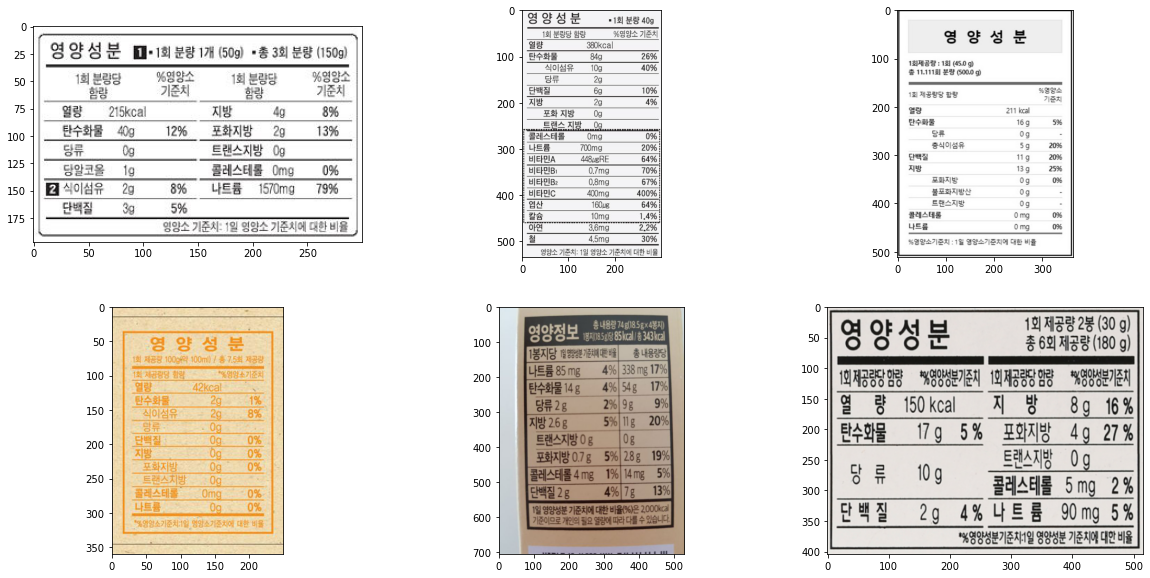

In [15]:
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    pil_img = Image.open(img_paths[np.random.randint(len(img_paths))])
    plt.imshow(pil_img)
plt.show()

# Google Cloud Vision API

In [19]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

20개의 이미지 중에서 5개를 랜덤하게 OCR 수행

In [22]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

# 입력 이미지 경로를 지정해 주세요.
# 20개의 모든 이미지는 너무 많기 때문에 랜덤하게 5개의 사진만 진행
for i in range(5):
    print(f'{i+1}번째 이미지\n')
    detect_text(img_paths[np.random.randint(len(img_paths))])
    print("-"*20+'\n\n')

-rw-r--r-- 1 aiffel0042 aiffel0042 2349 10월  7 11:20 /home/aiffel0042/aiffel/ocr_python/my_google_api_key.json
1번째 이미지

Texts:

"영 양 성 분
1회제공량: 1회 (45.0 g)
총 11.111회 분량 (500.0 g)
%영양소
기준치
1회 제공량당 함량
열량
211 kcal
탄수화물
16 g
5%
당류
0g
총식이섬유
5 g
20%
단백질
11 g
20%
지방
13 g
25%
0%
포화지방
불포화지방산
트랜스지방
0g
0g
0g
O mg
O mg
0%
콜레스테롤
0%
나트륨
%영양소기준치 : 1일 영양소기준치에 대한 비율
"

"영"

"양"

"성"

"분"

"1"

"회"

"제공량"

":"

"1"

"회"

"("

"45.0"

"g"

")"

"총"

"11.111"

"회"

"분량"

"("

"500.0"

"g"

")"

"%"

"영양소"

"기준치"

"1"

"회"

"제공량"

"당"

"함량"

"열량"

"211"

"kcal"

"탄수화물"

"16"

"g"

"5%"

"당류"

"0g"

"총"

"식이"

"섬유"

"5"

"g"

"20%"

"단백질"

"11"

"g"

"20%"

"지방"

"13"

"g"

"25%"

"0%"

"포화"

"지방"

"불포화"

"지방산"

"트랜스"

"지방"

"0g"

"0g"

"0g"

"O"

"mg"

"O"

"mg"

"0%"

"콜레스테롤"

"0%"

"나트륨"

"%"

"영양소"

"기준치"

":"

"1"

"일"

"영양소"

"기준치"

"에"

"대한"

"비율"
bounds: (264,475),(287,475),(287,488),(264,488)
--------------------


2번째 이미지

Texts:

"영양성분
·1회 분량 40g
%영양소 기준치
1회 분량당 함량
열량
탄수화물
380kcal
84g
26%
식이섬유
40

# keras-ocr
---
- 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR
- 검출 모델 : CRAFT(Character Region Awarness for Text Detection)
- 인식 모델 : CRNN(Convolutional Recurrent Neural Network)
    - [RCNN?, CRNN?](https://ballentain.tistory.com/31)
---
- ```keras_ocr.pipeline.Pipeline()```
    - 인식을 위한 파이프라인을 생성, 이때 초기화 과정에서 <u>미리 학습된 가중치(weight)</u>를 불러온다.
    - 검출기, 인식기를 위한 가중치 하나씩을 불러온다.  
    <br>  
- 파이프라인의 ```recognize()```
    - 내부적으로 검출기와 인식기를 두고, 검출기로 바운딩 박스(Bounding Box, 문자가 있는 영역)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거친다  
    <br>  
- keras-orc는 한글 데이터셋으로 훈련이 되어 있지 않은 모델이기 때문에 한글 텍스트의 detection이 정상적으로 진행되지 않을 수 있다.

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


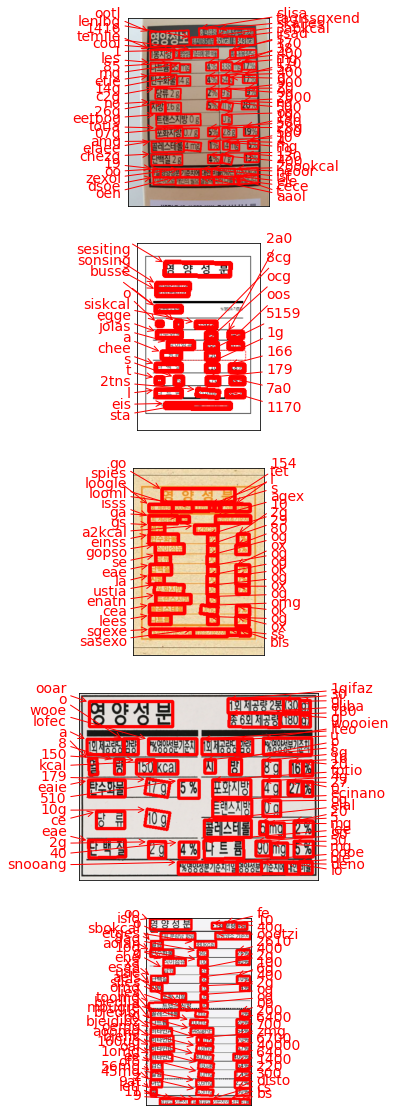

In [63]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

random_idx = np.random.choice(np.arange(len(img_paths)), 5)

image_paths = []
for i in random_idx :
    image_paths.append(img_paths[i])

images = [ keras_ocr.tools.read(path) for path in image_paths]
prediction_groups = [pipeline.recognize([path]) for path in image_paths]

fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# Tesseract
---
- 구글에서 후원하는 OCR 오픈소스 라이브러리
- 버전 4에서는 LSTM이 엔진에 추가, 현재 한국어 포함 116개 언어를 지원
---
## 사용하기 전에
1. 테서랙트 설치
```Bash
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev
```  
    
2. 테서랙트 파이썬 wrapper 설치
    - ```Pytesseract```는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리
```Bash
$ pip install pytesseract
```  
    
3. 한국어 사용하기
    - 아래 코드에서 ```lang='kor'```로 한국어 사용 가능
    - 그 전에 테서랙트의 언어팩을 설치해야 정상적으로 동작
```Bash
$ sudo apt install tesseract-ocr-kor
```
---
### 문자 검출, 이미지 자르기 (detection)
- ```crop_word_regions()``` 함수
    - 이미지를 받아서, 문자를 검출한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴
    - ```pytesseract.image_to_data()```
        - ```pytesseract```의 ```Output```을 사용해서 결과값의 형식을 딕셔터리 형식으로 설정
    - 인식된 결과가 ```recognized_data```에 저장, 바운딩 박스의 left, top, width, height 정보 

In [64]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
#             print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [65]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
# img_file_path = work_dir + '/images/13.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 
cropped_image_path_list = []
for i in range(len(image_paths)) :
    img_file_path = image_paths[i]
    if not os.path.exists(os.path.join(work_dir, f'result_{i}')) :
        os.makedirs(os.path.join(work_dir, f'result_{i}'))
    
    tmp = crop_word_regions(img_file_path, os.path.join(work_dir, f'result_{i}'))
    print(f'{i+1}번째 이미지 완료')
    cropped_image_path_list.extend(tmp)

1번째 이미지 완료
2번째 이미지 완료
3번째 이미지 완료
4번째 이미지 완료
5번째 이미지 완료


In [66]:
cropped_image_path_list

['/home/aiffel0042/aiffel/ocr_python/result_0/0000.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0000.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0001.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0002.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0003.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0004.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0005.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0006.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0007.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0008.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0009.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0010.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0011.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0012.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0013.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0014.png',
 '/home/aiffel0042/aiffel/ocr_python/result_1/0015.png',
 '/home/aiffel0042/aiffel/ocr_p

### 잘린 이미지에서 단어 인식하기
- ```image_to_string```
    - 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결과값으로 나온다.  
    <br>  
- ```random_idx``` : 랜덤 인덱스

    - 영양 성분표의 경우 한 이미지에 포함된 정보가 매우 많기 때문에 위에서 detection 하고나서 자른 이미지들중 랜덤하게 5개를 가져온다.
    
    - ```np.random.choice(..., replace=False)``` : 비복원 추출
    
    ```python
    import numpy as np
    np_arr = np.arange(10)  
    # array([0, 1, 2, ..., 8, 9])
    random = np.random.choice(np_arr, 5, replace=False) 
    # array([7, 3, 2, 6, 0])
    ```  
    <br>  
- ```cropped_image_paths``` : 랜덤한 이미지 경로 리스트
    - 기존에 detection후에 crop한 이미지들이 저장되어 있는 리스트 ```cropped_image_path_list```로부터 랜덤하게 경로들을 따로 리스트로 받아주었다.

In [68]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [78]:
random_idx = np.random.choice(np.arange(len(cropped_image_path_list)), 5, replace=False)

# cropped_image_path_list 에서 랜덤하게 선택해서 copped_image_paths에 저장

cropped_image_pahts = []
for idx in random_idx:
    cropped_image_pahts.append(cropped_image_path_list[idx])
cropped_image_pahts

['/home/aiffel0042/aiffel/ocr_python/result_1/0032.png',
 '/home/aiffel0042/aiffel/ocr_python/result_4/0037.png',
 '/home/aiffel0042/aiffel/ocr_python/result_3/0017.png',
 '/home/aiffel0042/aiffel/ocr_python/result_3/0032.png',
 '/home/aiffel0042/aiffel/ocr_python/result_4/0050.png']

In [79]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_pahts)

나트 름  237004 117%

기준치에 대한 비율

송당당 임당

스테롤

비

Done


OCR을 수행해서 자른 이미지들을 인식해서 글자로 출력해보았지만 확인하기 힘들다.  
사진과 함게 결과를 표시해주었다.

나트 름  237004 117%

Done


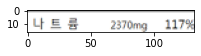

기준치에 대한 비율

Done


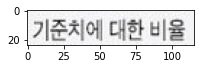

송당당 임당

Done


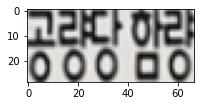

스테롤

Done


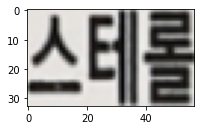

비

Done


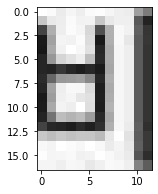

In [82]:
for i in range(5) :
    plt.figure(figsize = (3, 3))
    pil_img = Image.open(cropped_image_pahts[i])
    recognize_images([cropped_image_pahts[i]])
    plt.imshow(pil_img)
    plt.show()

# 정리 및 결론
---
  
1. Google Cloud Vision API
    - 결과 캡쳐
        ![image](https://user-images.githubusercontent.com/48716219/95621459-b018cc80-0aac-11eb-92f3-9d8d7cc8362f.png)
    - 다른 OCR 방법들보다 훨씬 인식률이 좋고 깔끔하게 나왔다.
    - 한국어, 영어(단위), 숫자, 기호(%), 잘못 나눠져있지도 않고 단어별로, 의미별로 잘 나눠져서 출력  
    <br>  
2. keras-ocr
    - 결과 캡쳐
        ![image](https://user-images.githubusercontent.com/48716219/95621708-1d2c6200-0aad-11eb-8ee5-91659d365b39.png)
    - 한글을 전혀 인식하지 못한다.
    - 영어와 숫자 또한 제대로 인식하지 못하였다.  
    <br>  
3. Tesseract
    - 결과 캡쳐
        ![image](https://user-images.githubusercontent.com/48716219/95621893-6bd9fc00-0aad-11eb-9ff8-a5091e6011d1.png)
    - 비교적 한글을 잘 인식하지만 Google Cloud Vision API보다는 인식률이 떨어지는 것을 볼 수 있다.
        - Google Cloud Vision API의 경우 '단 백 질'을 한 단어로 인식하였지만 Tesseract의 경우는 단어가 온전하지 않은 결과도 많이 보였다.
    - 2370mg의 경우 237004로 인식을 했는데 숫자는 정확하게 인식을 하는 것 같다.
        - 인식 언어를 한국어(```lang='kor'```)로 해서 영어를 인식(단위)하지 못한다.
---
## 식품의 영양성분표를 OCR로 활용하려면?
- 다음과 같은 순서대로 좋은 성능을 보여준다.
    1. Google Clound Vision API
    2. Tesseract
       - keras-ocr에 비해서 나을 뿐이지 영양성분의 단위 부분을 제대로 인식하지 못한다면 많은 데이터를 다룰때 많이 힘들 것이다.
    3. keras-ocr
        - 한글 인식 뿐만 아니라 숫자와 영어(단위) 구분도 잘 못하고 있다.